In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#  <table><tr><td bgcolor=#FF4500><font  size=5 face="黑体">1 图像的基本操作</font></td></tr></table>
<table><tr>Python的版本是Python3.6，openCV使用的是cv2
</tr></table>




## <table><tr><td bgcolor=#FF4500><font size=4 face="黑体">1.1 图像的读取、显示和保存</font></td></tr></table>
读取图像：cv2.imread(filename,flags)

该函数有两个参数，第一个参数是图片的地址，第二个参数是读取图像的方式（默认值为1，以RGB格式读取）


显示图片：cv2.imshow(winname,mat)

以窗口的形式显示图片，两个参数，第一个是窗口上显示的名称，第二个是图像在代码中的表示名称

保存图片：cv2.imwrite(filename,img,params)

N个参数，第一个是要保存的图像的名字，如 'Rachel.jpg' ，第二个是也是图像在代码中的表示名称，此外还有图像的质量等参数，暂且略过

销毁全部窗口：cv2.destroyALLWindows()

销毁特定窗口：cv2.destroyWindow(winname)     括号里填指定窗口名称

绑定按键：cv2.waitKey(delay)

示例代码：

按下 s 键保存图片到 png 格式

<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1564587393203&di=35a764d7ae2593a9cac5bf1f14bfefd2&imgtype=0&src=http%3A%2F%2Fn.sinaimg.cn%2Ffront%2F349%2Fw640h509%2F20180423%2FFY5_-fzqvvrz9566957.jpg" width="50%" height="50%" />


In [2]:
# image show a window using opencv.
img = cv2.imread('./1.jpeg', 1) # '1' 是RGB， ‘0’是灰度
# cv2.imshow('ysy', img) # 显示窗口名称ysy
# k = cv2.waitKey(0) # 等待按键，返回按键ASCII
'''
if k == ord('s'): # 若按下 s
    cv2.imwrite('ysy_gray.png', img)
    cv2.destroyAllWindows() # 删除全部窗口
'''

"\nif k == ord('s'): # 若按下 s\n    cv2.imwrite('ysy_gray.png', img)\n    cv2.destroyAllWindows() # 删除全部窗口\n"

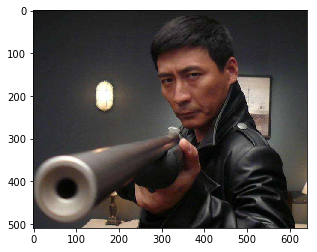

In [3]:
# image show inline jupyter using matplotlib
# plt.figure(figsize=(15,10)) # 设置画布大小
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## <table><tr><td bgcolor=#FF4500><font size=4 face="黑体">1.2 图像的缩放</font></td></tr></table>
缩放图片是非常常用的操作，cv2里面的函数是：cv2.resize

函数原型：cv2.resize(src, dst, dsize, fx=0, fy=0, interpolation=INTER_LINEAR )

fx,fy表示缩放比例，interpolation是缩放时填充的类型，有以下几种：

INTER_NEAREST（邻近元素插值法）

INTER_LINEAR（缺省值，双线性插值）

INTER_AREA（使用象素关系重采样。当图像缩小时候，该方法可以避免波纹出现。当图像放大时，类似于 CV_INTER_NN 方法）

INTER_CUBIC（立方插值）

示例代码：

图片变成原图的0.5倍的灰度图

In [4]:
img_resize =cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

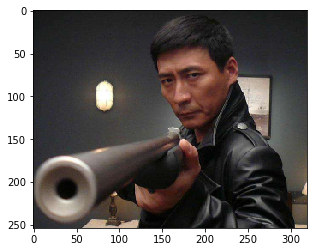

In [5]:
# image show inline jupyter using matplotlib
plt.figure() # 设置画布
plt.imshow(cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB))
plt.show()

## <table><tr><td bgcolor=#FF4500><font size=4 face="黑体">1.3 图像的翻转与旋转</font></td></tr></table>
图像翻转用到的函数是cv2.flip

函数原型：cv2.flip(src, dst, flipCode)

flipCode，翻转模式，flipCode==0垂直翻转（沿X轴翻转），flipCode>0水平翻转（沿Y轴翻转），flipCode<0水平垂直翻转（先沿x轴翻转，再沿Y轴翻转，等价于旋转180°）

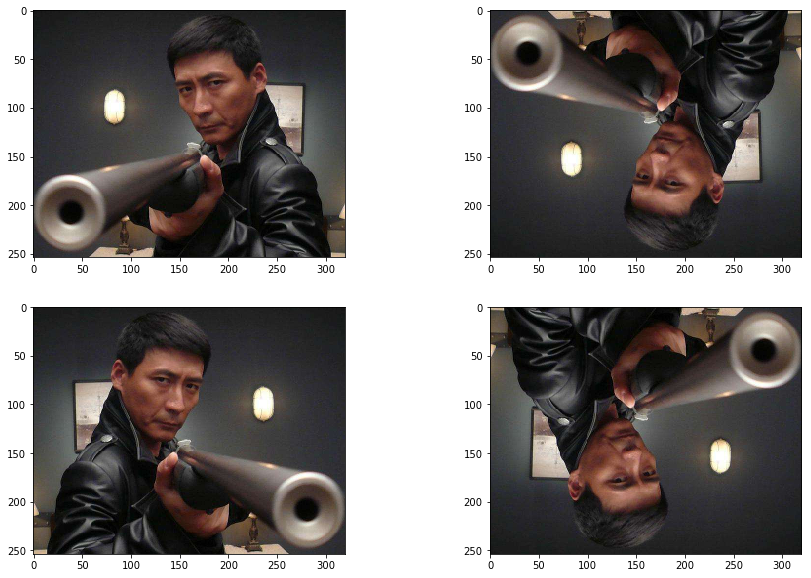

In [6]:
# 翻转
new = img_resize # 原图
img_new1 = cv2.flip(new, 0)
img_new2 = cv2.flip(new, 1)
img_new3 = cv2.flip(new, -1)


# 创建画布, 把四个图画在一个画布里面
plt.figure(figsize=(15,10))
# （1,1）
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

# 选择ax1
plt.sca(ax1)
plt.imshow(cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB))
# 选择ax2
plt.sca(ax2)
plt.imshow(cv2.cvtColor(img_new1, cv2.COLOR_BGR2RGB))
# 选择ax3
plt.sca(ax3)
plt.imshow(cv2.cvtColor(img_new2, cv2.COLOR_BGR2RGB))
# 选择ax4
plt.sca(ax4)
plt.imshow(cv2.cvtColor(img_new3, cv2.COLOR_BGR2RGB))

----------------------------------------------
图像旋转用到的函数是cv2.getRotationMatrix2D

函数原型：getRotationMatrix2D(center,angle,scale)

center一般是中心点的坐标，用元组表示

angle角度是逆时针旋转的角度

scale是比例，有放大或缩小图像的作用

示例代码：

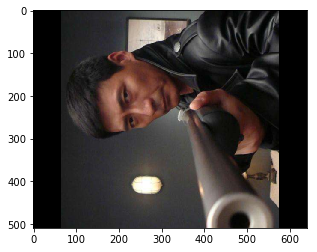

In [7]:
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(img, M, (cols, rows)) # 仿射变化，之后会讲
plt.figure() # 设置画布
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

## <table><tr><td bgcolor=#FF4500><font size=4 face="黑体">1.4 图像的基本信息</font></td></tr></table>

In [8]:
import cv2
import requests
import time
from PIL import Image
from io import BytesIO

# set None proxy
import os
os.environ['no_proxy'] = '*' 

In [9]:
img = cv2.imread('1.jpeg')
color_img = cv2.imread('1.jpeg',  cv2.IMREAD_COLOR)
gray_img = cv2.imread('1.jpeg',  cv2.IMREAD_GRAYSCALE)

# 获取信息：行，列，通道，像素数目，图像数据类型
print(color_img.shape, color_img.size, color_img.dtype)
print(gray_img.shape, gray_img.size, gray_img.dtype)

(509, 640, 3) 977280 uint8
(509, 640) 325760 uint8


time 0.03805685043334961
time 0.05959320068359375
time 0.057103633880615234
time 0.04566621780395508
time 0.044306039810180664
time 0.0460968017578125
time 0.03691911697387695
time 0.03940176963806152
time 0.03730368614196777
time 0.04784965515136719


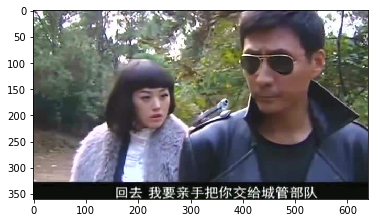

(360, 640, 3) 691200 uint8
(360, 640) 230400 uint8


In [10]:
# Internet picture
url = "https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1565165195&di=0ae43289971ee5b3cdc36eb9c9612a0a&imgtype=jpg&er=1&src=http%3A%2F%2Fvpic.video.qq.com%2F3388556%2Fx0540ujyh6i_ori_3.jpg"

# get file(of Internet picture)
for i in range(10):
    start=time.time()
    file = requests.get(url)
    img = cv2.imdecode(np.fromstring(file.content, np.uint8), 1)    #file.content 是读取的远程文件的字节流
    print('time',time.time()-start)

#using plt draw picture
plt.figure() # 设置画布
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

    
# using PIL.Image to read Internet file of picture
## image = Image.open(BytesIO(file.content))
## image.show()

# using cv2 to read Internet file of picture
color_img = img
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 获取信息：行，列，通道，像素数目，图像数据类型
print(color_img.shape, color_img.size, color_img.dtype)
print(gray_img.shape, gray_img.size, gray_img.dtype)

In [11]:
import os
os.environ['no_proxy'] = '*' 
print(requests.get("https://www.baidu.com"))  


<Response [200]>


In [ ]:
# session method
session = requests.Session()
session.trust_env = False
response = session.get('http://www.stackoverflow.com')


In [ ]:
start=time.time()
file = requests.get("https://www.baidu.com/img/bd_logo1.png")
img = cv2.imdecode(np.fromstring(file.content, np.uint8), 1)    #file.content 是读取的远程文件的字节流
print('time',time.time()-start)
cv2.imshow("1",img)
cv2.waitKeyEx()


time 0.18430542945861816
